FADLI NAZIM

## 1.The Markov Jump process

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1. Presentation of the model

Vehicles pass a crossing at the instants of a Poisson process of intensity $\gamma>0$; you need a gap of time 
length at least S in order to cross.

We introduce $(X_{t})_{t \geqslant 0}$ the jump process such that, for every $t\geqslant 0$, $X_{t}=n$, the number of vehicles.


### 1.2. Simulation of the Markov Jump process

1. Propose a simulation method for the path of the Markov Jump process on $[0,T]$ starting from $x = 0$.

Number of Safe Crossings: 10


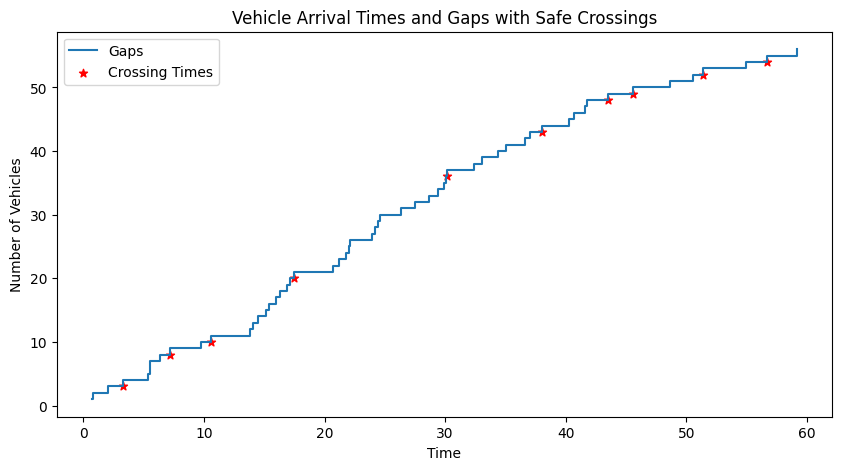

In [284]:
def simulate_crossing(lambda_, S, total_time,arrival_time = 0):
    # Generate vehicle arrival times
    arrivals = []
    while arrival_time < total_time:
        interarrival_time = np.random.exponential(1 / lambda_)
        arrival_time += interarrival_time
        arrivals.append(arrival_time)



    # Determine the gaps
    gaps = np.diff(arrivals) # time \gammaetween each vehicle arrival
    
    # Check for gaps large enough for crossing
    safe_gaps = gaps >= S
    number_of_safe_crossings = np.sum(safe_gaps)
    
    return number_of_safe_crossings, arrivals, gaps

# Parameters
lambda_ = 1  # vehicles per second
S = 2    # minimum gap required to cross
total_time = 60  

# Simulation
number_of_safe_crossings, arrivals, gaps = simulate_crossing(lambda_, S, total_time)
print(f'Number of Safe Crossings: {number_of_safe_crossings}')


# add the crossing times to the plot
crossing_indices = np.where(gaps >= S)[0]
crossing_times = np.array(arrivals)[crossing_indices]

plt.figure(figsize=(10, 5))
plt.step(arrivals[:-1], list(range(1, len(arrivals))), where='post', label='Gaps')
plt.scatter(crossing_times, crossing_indices, color='red', label='Crossing Times', marker='*')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Vehicle Arrival Times and Gaps with Safe Crossings')
plt.show()



## 2.Estimation of the first crossing time

Given that vehicles pass a crossing according to a Poisson process with rate $\gamma>0$ and a safe crossing requires a gap of at least $S$ seconds, $T$ the first time at which we succeed in crossing  the expected time, $ n \geq 1 : 
T_n - T_{n-1} $ are  independent (interarrival time) with exponential law of rate $\gamma>0$.

So either we get $T = S$ the first gap is enough to cross or we have a first gap $< S$ and we wait more to cross : 
 
$$ T = \inf\{t \geq S : X_{t} = X_{t-S}\} $$


( $T_{1}$ is the first time a vehicule passes ) 

We will compute $E(T)$ :

### Integral ( by conditionning on $T_{1} = T_{1} - T_{0}$)

(First step analysis)

$$ E(T) = \int_0^{\inf} 1_{\{S \geq T_{1}\}} [x + E(T)] \gamma e^{-\gamma x} \, dx + S * P(T_1 >= S)


= \int_0^S [x + E(T)] \gamma e^{-\gamma x} \, dx + S e^{-\gamma S} 
$$


### Solving the Integral

**First Part**:
$$ \int_0^S x  e^{-\gamma x} \, dx = \left[ -\frac{x}{\gamma} e^{-\gamma x} \right]_0^S + \int_0^S   \frac{e^{-\gamma x}}{\gamma}  \, dx = -\frac{S}{\gamma} e^{-\gamma S} +   \frac{(1 - e^{-\gamma S})}{\gamma^2} $$

**Second Part**:
$$ \int_0^S E(T) \gamma e^{-\gamma x} \, dx = E(T) \gamma \left[ -\frac{1}{\gamma} e^{-\gamma x} \right]_0^S = E(T) (1 - e^{-\gamma S}) $$

**Solve for $ E(T) $**:
$$ E(T) = \gamma \left[ -\frac{S}{\gamma} e^{-\gamma S} + \frac{1}{\gamma^2} (1 - e^{-\gamma S}) + E(T) \frac{1}{\gamma} (1 - e^{-\gamma S}) \right] + S e^{-\gamma S} $$
$$ = \frac{1 - e^{-\gamma S}}{\gamma} + E(T) (1 - e^{-\gamma S}) + S e^{-\gamma S} $$


$$ E(T) - E(T) (1 - e^{-\gamma S}) = \frac{1}{\gamma} (1 - e^{-\gamma S}) + S e^{-\gamma S} $$
$$ E(T) = \frac{1 - e^{-\gamma S}}{\gamma} e^{\gamma S} $$
$$ E(T) = \frac{e^{\gamma S} - 1}{\gamma} $$

### Conclusion

Thus, the expected time $ E(T) $ until a gap of at least $ S $ seconds can be found, allowing for safe crossing:

$$ E(T) = \frac{e^{\gamma S} - 1}{\gamma} $$




Mean Time to Cross: 7.242367944426078


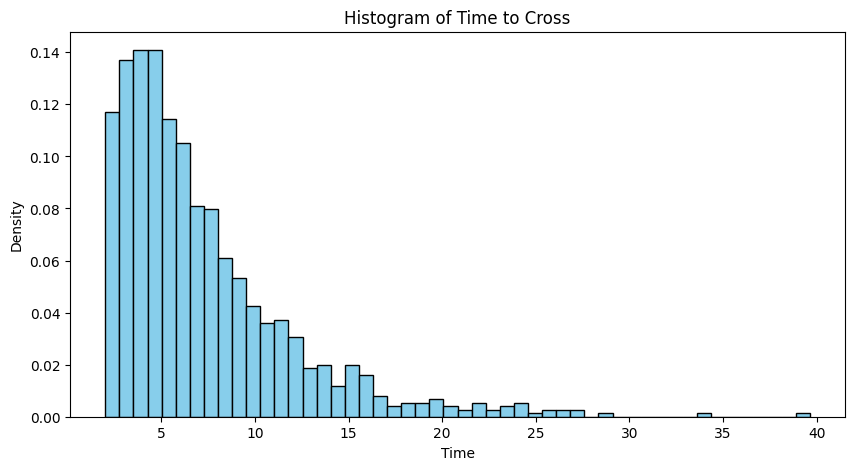

In [229]:
def first_cross_time(lambda_, S, total_time):
    time_to_cross = []
    
    number_of_safe_crossings, arrivals, gaps = simulate_crossing(lambda_, S, total_time)
    if number_of_safe_crossings > 0:
        crossing_indices = np.where(gaps >= S)[0]
        crossing_times = np.array(arrivals[:-1])[crossing_indices]
        first_crossing_time = crossing_times[0] + S
    return first_crossing_time if number_of_safe_crossings > 0 else None


# Parameters
lambda_ = 1  # vehicles per second
S = 2    # minimum gap required to cross
total_time = 60
number_of_simulations = 1000

# Simulation
time_to_cross = []
for _ in range(number_of_simulations):
    crossing_time = first_cross_time(lambda_, S, total_time)
    if crossing_time is not None:  # check if crossing_time is not None 
        time_to_cross.append(crossing_time)


print(f'Mean Time to Cross: {np.mean(time_to_cross)}')


plt.figure(figsize=(10, 5))
plt.hist(time_to_cross, bins=50, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Histogram of Time to Cross')
plt.show()


# let's consider tow cases for the crossing time
 1. The crossing time of two lines is the same (highway)

$$
E(T_{S_{1}+S_{2}}) =  \frac{e^{(\gamma_{1} + \gamma_{2}) S_{1}+S_{2}} - 1}{\gamma_{1} + \gamma_{2}}
$$

 2. The crossing can be done one after the other 

$$
E(T_{S_1}) + E(T_{S_2}) =  \frac{e^{\gamma_{1} S_{1}} - 1}{\gamma_{1}} +\frac{e^{\gamma_{2} S_{2}} - 1}{\gamma_{2}} 
$$


Number of Safe Crossings: 0
No safe crossings.


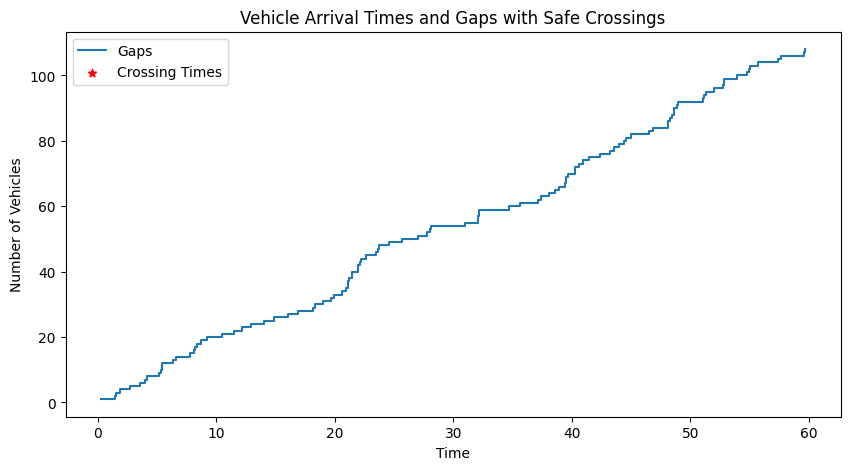

In [302]:
# let's consider tow cases for the crossing time
# 1. The crossing time of two lines is the same (highway)

line_1 = 1
line_2 = 2
lambda_2 = 1  # vehicles per second
lambda_1 = 1  # vehicles per second

# Parameters
lambda_ = lambda_1 + lambda_2  # We know that two independent poisson processes sum to a poisson process
S = line_1 + line_2    # minimum gap required to cross
total_time = 60

# Simulation
number_of_safe_crossings, arrivals, gaps = simulate_crossing(lambda_, S, total_time)
print(f'Number of Safe Crossings: {number_of_safe_crossings}')


# add the crossing times to the plot
crossing_indices = np.where(gaps >= S)[0]
crossing_times = np.array(arrivals)[crossing_indices]




if crossing_times.size > 0:
    print(f'Time to cross the highway: {crossing_times[0] + S}')
else:
    print('No safe crossings.')
plt.figure(figsize=(10, 5))
plt.step(arrivals[:-1], list(range(1, len(arrivals))), where='post', label='Gaps')
plt.scatter(crossing_times, crossing_indices, color='red', label='Crossing Times', marker='*')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()    
plt.title('Vehicle Arrival Times and Gaps with Safe Crossings')
plt.show()



Number of Safe Crossings(line_1): 22


First Crossing Time(line_1): 2.032775518634612


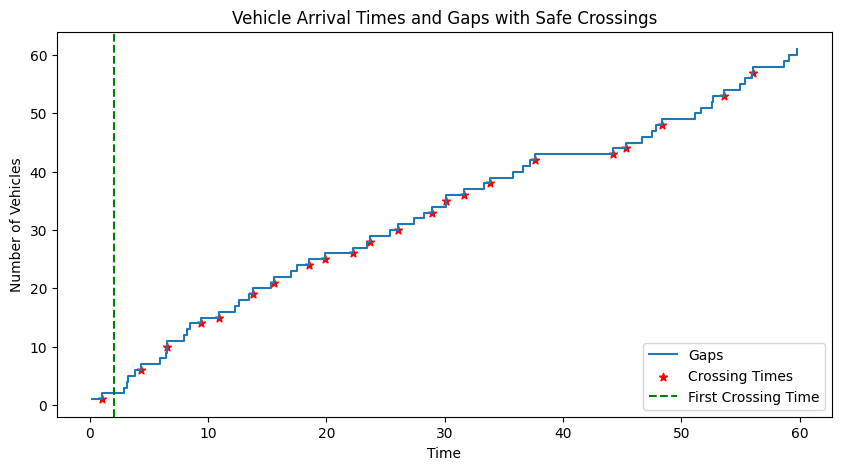

Number of Safe Crossings(line_2): 3


First Crossing Time(line_2): 5.366195948994946


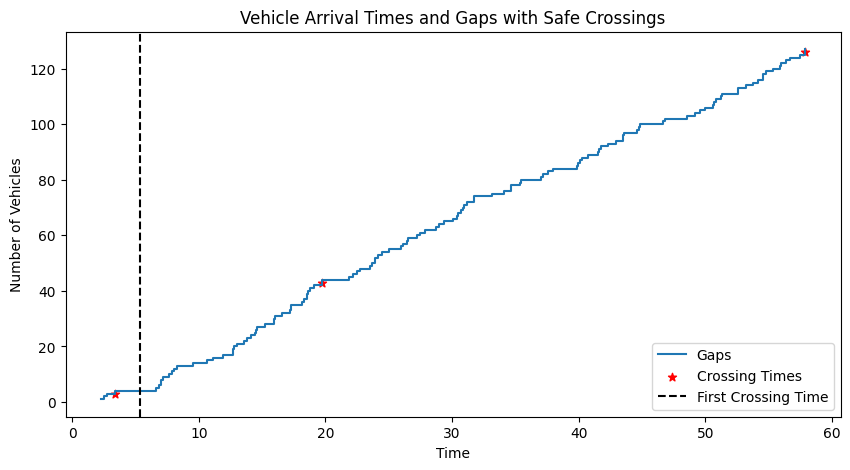

In [303]:
# let us consider the case where the crossing can be done one after the other 
# Parameters

lambda_1 = 1  # vehicles per second
S = line_1     # minimum gap required to cross
total_time = 60

# Simulation
number_of_safe_crossings_1, arrivals_1, gaps_1 = simulate_crossing(lambda_1, S, total_time)
print(f'Number of Safe Crossings(line_1): {number_of_safe_crossings_1}')

# add the crossing times to the plot
crossing_indices_1 = np.where(gaps_1 >= S)[0]
crossing_times_1 = np.array(arrivals_1[:-1])[crossing_indices_1]
first_crossing_time_line_1 = crossing_times_1[0] + S

print("\n")
print(f'First Crossing Time(line_1): {first_crossing_time_line_1}')
plt.figure(figsize=(10, 5))
plt.step(arrivals_1[:-1], list(range(1, len(arrivals_1))), where='post', label='Gaps')
plt.scatter(crossing_times_1, crossing_indices_1, color='red', label='Crossing Times', marker='*')
plt.axvline(first_crossing_time_line_1, color='green', linestyle='--', label='First Crossing Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()    
plt.title('Vehicle Arrival Times and Gaps with Safe Crossings')
plt.show()


###########################################################################################################

# i want to simulate the crossing of the second line
# Parameters
lambda_2 = 2 # vehicles per second
S = line_2     # minimum gap required to cross
total_time -= first_crossing_time_line_1

number_of_safe_crossings, arrivals, gaps = simulate_crossing(lambda_2, S, total_time, arrival_time=first_crossing_time_line_1)
print(f'Number of Safe Crossings(line_2): {number_of_safe_crossings}')


# add the crossing times to the plot
crossing_indices_2 = np.where(gaps >= S)[0]
crossing_times_2 = np.array(arrivals[:-1])[crossing_indices_2]
first_crossing_time_line_2 = crossing_times_2[0] + S


print("\n")
print(f'First Crossing Time(line_2): {first_crossing_time_line_2}')
plt.figure(figsize=(10, 5))
plt.step(arrivals[:-1], list(range(1, len(arrivals))), where='post', label='Gaps')
plt.scatter(crossing_times_2, crossing_indices_2, color='red', label='Crossing Times', marker='*')
plt.axvline(first_crossing_time_line_2, color='black', linestyle='--', label='First Crossing Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Vehicle Arrival Times and Gaps with Safe Crossings')
plt.show()



Illustration of the two cases :

<div style="display: flex ; justify-content: space-around">
<img src= "assets/2.jpg" width="300" height="300" /> <img src="assets/1.jpg" width="300" height="300" />
</div>